#### Importing necessary liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

##### Merging 12 months of sales data into a single csv file

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    data = pd.concat([data, df]) 

data.to_csv("yearly_sales_data.csv", index=False)

#### Reading the updated dataframe

In [3]:
data = pd.read_csv('yearly_sales_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Cleaning up the data

#### Total missing values

In [5]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Dropping rows of NaN

In [6]:
data = data.dropna(how='all')

In [7]:
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Finding & Deleting 'Or'  from Month Coloumn

In [8]:
df = data[data['Order Date'].str[0:2]=='Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
data = data[data['Order Date'].str[0:2]!='Or']

#### Converting Cloumn into the correct type

In [10]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Order Date'] = pd.to_datetime(data['Order Date'])

#### Adding Columns

In [11]:
data['Hour'] = data['Order Date'].dt.hour
data['Month'] = data['Order Date'].dt.month
data['Sales']=data['Quantity Ordered']*data['Price Each']
data['City']=data['Purchase Address'].apply(lambda x : x.split(',')[1])

In [12]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,4,11.99,Los Angeles


### Insights From Data

### What was the best month for sales ?

In [13]:
data.groupby('Month').sum().sort_values('Sales',ascending=False)

,Quantity Ordered,Price Each,Hour,Sales
Month,,,,
12,28114,4.588415e+06,359978,4.613443e+06
10,22703,3.715555e+06,290650,3.736727e+06
4,20558,3.367671e+06,262259,3.390670e+06
11,19798,3.180601e+06,254865,3.199603e+06
5,18667,3.135125e+06,238780,3.152607e+06
3,17005,2.791208e+06,218969,2.807100e+06
7,16072,2.632540e+06,206169,2.647776e+06
6,15253,2.562026e+06,195528,2.577802e+06
8,13448,2.230345e+06,172289,2.244468e+06


In [14]:
x=np.arange(1,13)
y=data.groupby('Month').sum()['Sales']

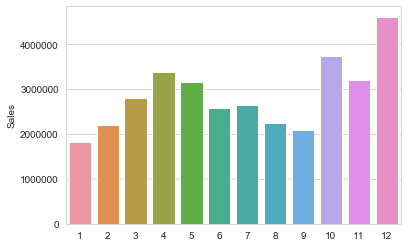

In [15]:
sns.set_style('whitegrid')
sns.barplot(x=x,y=y);

### December was the best month for Sales

### What city had the highest number of sales ?

In [16]:
data.groupby('City').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Hour,Month,Sales
City,,,,,
San Francisco,50239,8.211462e+06,643265,315520,8.262204e+06
Los Angeles,33289,5.421435e+06,427444,208325,5.452571e+06
New York City,27932,4.635371e+06,357696,175741,4.664317e+06
Boston,22528,3.637410e+06,288225,141112,3.661642e+06
Atlanta,16602,2.779908e+06,214264,104794,2.795499e+06
Dallas,16730,2.752628e+06,214390,104620,2.767975e+06
Seattle,16553,2.733296e+06,213292,104941,2.747755e+06
Portland,14053,2.307747e+06,179632,87765,2.320491e+06
Austin,11153,1.809874e+06,141946,69829,1.819582e+06


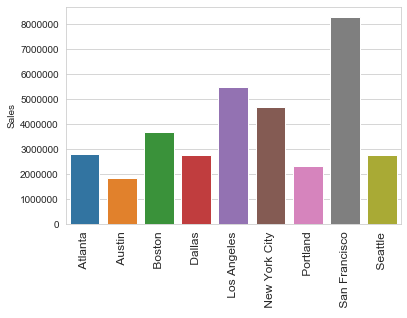

In [17]:
df = data.groupby('City').sum()
x = df.index.values.tolist()
y = data.groupby('City').sum()['Sales']
ax = sns.barplot(x=x, y=y);
ax.set_xticklabels(rotation=90, labels=x, size=12);

### San Francisco had the highest number of sales

### What time should we display advertisements to maximize likelihood of customer's buying product ?

In [18]:
data.groupby('Hour').count().sort_values('Sales', ascending=False).head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
19,12905,12905,12905,12905,12905,12905,12905,12905,12905
12,12587,12587,12587,12587,12587,12587,12587,12587,12587
11,12411,12411,12411,12411,12411,12411,12411,12411,12411
18,12280,12280,12280,12280,12280,12280,12280,12280,12280
20,12228,12228,12228,12228,12228,12228,12228,12228,12228


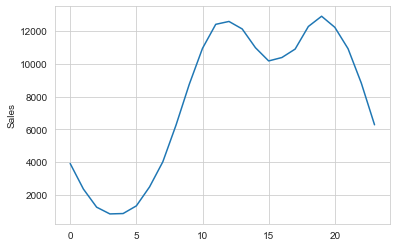

In [19]:
x=np.arange(0,24)
y=data.groupby('Hour').count()['Sales']
sns.lineplot(x=x,y=y);

### Best Time for Advertisement is 11 AM, 12 PM & 6-8 PM.

### What product sold the most ?

In [20]:
data.groupby('Product').count().sort_values('Sales', ascending=False).head()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Month,Sales,City
Product,,,,,,,,,
USB-C Charging Cable,21903,21903,21903,21903,21903,21903,21903,21903,21903
Lightning Charging Cable,21658,21658,21658,21658,21658,21658,21658,21658,21658
AAA Batteries (4-pack),20641,20641,20641,20641,20641,20641,20641,20641,20641
AA Batteries (4-pack),20577,20577,20577,20577,20577,20577,20577,20577,20577
Wired Headphones,18882,18882,18882,18882,18882,18882,18882,18882,18882


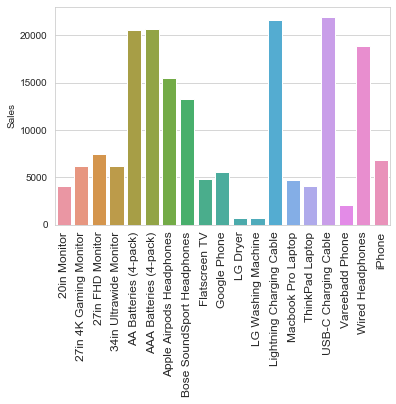

In [21]:
df = data.groupby('Product').count()
x = df.index.values.tolist()
y = data.groupby('Product').count()['Sales']
ax = sns.barplot(x=x,y=y)
ax.set_xticklabels(rotation=90, labels=x, size=12);

#### Above you can see USB-C Charging Cable, Lightning Charging Cable, AAA Batteries (4-pack) are the most sold product

### What products are most often sold together ?

In [22]:
df = data[data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID',"Grouped"]].drop_duplicates()
df.head()

C:\Users\Jatin Chaturani\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for k,v in count.most_common(10):
    print(k, v)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Above you can see the products which are sold often together